# Ebay Car Sales

In this notebook, we will be exploring data about Ebay Car Sales on the German Craigslist equivalent Ebay Kleinanzeigen.
The dataset was found here: https://www.kaggle.com/orgesleka/used-cars-database

We'll try different methods of exploring data, visualizing data and applying machine learning algorithms.

We will be working with a copy of the original data to avoid making changes to our original dataset.

In [1]:
# Importing some common modules/libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
autos = pd.read_csv("autos_copy.csv", encoding='latin1')

In [3]:
autos.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
279240,2016-04-04 18:50:10,Opel_Astra_2.0_DTI_TÜV!,privat,Angebot,1300,test,kombi,2001,manuell,101,astra,150000,11,diesel,opel,nein,2016-04-04 00:00:00,0,92253,2016-04-06 21:15:55
95318,2016-03-12 15:43:28,BMW_X5_xDrive30d,privat,Angebot,28800,control,limousine,2012,automatik,245,x_reihe,150000,3,diesel,bmw,nein,2016-03-12 00:00:00,0,76133,2016-04-07 02:46:14
250434,2016-03-09 20:45:20,E270T_CDI_Elegance__7_Sitzer__Leder__Vollausst...,privat,Angebot,2990,test,kombi,2001,automatik,177,e_klasse,150000,1,diesel,mercedes_benz,NaN,2016-03-09 00:00:00,0,53520,2016-03-15 09:45:22
303436,2016-03-28 19:48:32,Fiat_Seicento_Hobby_1.1,privat,Angebot,400,control,kleinwagen,1999,manuell,54,seicento,150000,9,benzin,fiat,ja,2016-03-28 00:00:00,0,51491,2016-04-01 05:17:23
358330,2016-04-01 17:57:19,Vw_Caddy_2_1.9_SDI__!!!!,privat,Angebot,1450,test,NaN,2016,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-04-01 00:00:00,0,2826,2016-04-05 13:45:01
219579,2016-03-13 20:36:20,Volkswagen_T4_Multivan,privat,Angebot,1990,control,bus,1993,manuell,68,transporter,150000,7,diesel,volkswagen,nein,2016-03-13 00:00:00,0,22399,2016-03-16 16:15:19
43423,2016-04-01 16:49:16,Peugeot_206_**Top_Zustand**,privat,Angebot,1150,control,NaN,2016,manuell,60,2_reihe,150000,1,NaN,peugeot,nein,2016-04-01 00:00:00,0,53894,2016-04-05 12:17:03
295055,2016-03-27 10:46:23,Porsche_Boxster_Boxster_987_S_mit_Approved_bis...,privat,Angebot,30500,control,cabrio,2009,manuell,295,boxster,100000,1,benzin,porsche,nein,2016-03-27 00:00:00,0,21227,2016-04-07 05:45:40
244890,2016-03-22 17:46:20,Porsche_911_Carrera_Cabrio_incl_Hardtop_Sammle...,privat,Angebot,39996,control,cabrio,2001,manuell,300,911,40000,2,benzin,porsche,nein,2016-03-22 00:00:00,0,86150,2016-04-06 08:46:03
3678,2016-03-20 18:39:41,Opel_Vectra_i500,privat,Angebot,1600,test,limousine,1998,manuell,194,vectra,40000,12,benzin,opel,nein,2016-03-20 00:00:00,0,97906,2016-04-07 01:45:27


In [4]:
autos.shape

(371528, 20)

In [5]:
autos.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [6]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

There are 20 columns in the dataset. Most of them are strings. There are also missing values in some columns. Also, the column names are not in our preferred format. But t'is but a scratch.

In [7]:
autos.columns = [
    "date_crawled", "name", "seller", "offer_type", "price", "abtest", "vehicle_type", "registration_year",
    "gearbox", "power_PS", "model", "kilometer", "registration_month", "fuel_type", "brand", "unrepaired_damage",
    "date_created", "nr_of_pictures", "postal_code", "last_seen"
]

In [8]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
date_crawled          371528 non-null object
name                  371528 non-null object
seller                371528 non-null object
offer_type            371528 non-null object
price                 371528 non-null int64
abtest                371528 non-null object
vehicle_type          333659 non-null object
registration_year     371528 non-null int64
gearbox               351319 non-null object
power_PS              371528 non-null int64
model                 351044 non-null object
kilometer             371528 non-null int64
registration_month    371528 non-null int64
fuel_type             338142 non-null object
brand                 371528 non-null object
unrepaired_damage     299468 non-null object
date_created          371528 non-null object
nr_of_pictures        371528 non-null int64
postal_code           371528 non-null int64
last_seen             371528 non-null obj

In [9]:
autos["date_crawled"].describe()

count                  371528
unique                 280500
top       2016-03-24 14:49:47
freq                        7
Name: date_crawled, dtype: object

In [10]:
autos["name"].sample(10)

77918                                 BMW_X3_xDrive20d_Aut.
257968    Renault_Laguna_Grandtour_2_2_l_dci_mit_Motorsc...
148371                                       DODGE_DART_270
230857                                    Mercedes_Vito_638
204467                           Verkaufe_Golf_3_4/5_Tuerer
309573    VW_Golf_2__2.Hand__Baujahr_1990_88.000_km_weis...
86132                    Reserviert_bis_Montag!_Corsa_C_1_2
163669                           Golf_3_1.8_75_PS_TÜV_08.16
323506                                        Mazda_626_1.9
356320                                        Audi_a4_b8_3l
Name: name, dtype: object

In [11]:
autos["seller"].describe()

count     371528
unique         2
top       privat
freq      371525
Name: seller, dtype: object

In [12]:
autos["offer_type"].describe()

count      371528
unique          2
top       Angebot
freq       371516
Name: offer_type, dtype: object

In [13]:
autos["price"].describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [14]:
autos["vehicle_type"].describe()

count        333659
unique            8
top       limousine
freq          95894
Name: vehicle_type, dtype: object

In [15]:
autos["vehicle_type"].isnull().sum()

37869

In [16]:
autos["registration_year"].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

In [17]:
autos["registration_year"].isnull().sum()

0

In [18]:
autos["gearbox"].describe()

count      351319
unique          2
top       manuell
freq       274214
Name: gearbox, dtype: object

In [19]:
autos["gearbox"].isnull().sum()

20209

In [20]:
autos["power_PS"].describe()

count    371528.000000
mean        115.549477
std         192.139578
min           0.000000
25%          70.000000
50%         105.000000
75%         150.000000
max       20000.000000
Name: power_PS, dtype: float64

In [21]:
autos["power_PS"].isnull().sum()

0

In [22]:
autos["model"].describe()

count     351044
unique       251
top         golf
freq       30070
Name: model, dtype: object

In [23]:
autos["model"].isnull().sum()

20484

In [24]:
autos["kilometer"].describe()

count    371528.000000
mean     125618.688228
std       40112.337051
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

In [25]:
autos["kilometer"].isnull().sum()

0

In [26]:
autos["registration_month"].describe()

count    371528.000000
mean          5.734445
std           3.712412
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: registration_month, dtype: float64

In [27]:
autos["registration_month"].isnull().sum()

0

In [28]:
autos["fuel_type"].describe()

count     338142
unique         7
top       benzin
freq      223857
Name: fuel_type, dtype: object

In [29]:
autos["fuel_type"].isnull().sum()

33386

In [30]:
autos["brand"].describe()

count         371528
unique            40
top       volkswagen
freq           79640
Name: brand, dtype: object

In [31]:
autos["brand"].isnull().sum()

0

In [32]:
autos["unrepaired_damage"].describe()

count     299468
unique         2
top         nein
freq      263182
Name: unrepaired_damage, dtype: object

In [33]:
autos["unrepaired_damage"].isnull().sum()

72060

In [34]:
autos["date_created"].describe()

count                  371528
unique                    114
top       2016-04-03 00:00:00
freq                    14450
Name: date_created, dtype: object

In [35]:
autos["date_created"].isnull().sum()

0

In [36]:
autos["nr_of_pictures"].describe()

count    371528.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: nr_of_pictures, dtype: float64

In [37]:
autos["postal_code"].describe()

count    371528.00000
mean      50820.66764
std       25799.08247
min        1067.00000
25%       30459.00000
50%       49610.00000
75%       71546.00000
max       99998.00000
Name: postal_code, dtype: float64

In [38]:
autos["last_seen"].describe()

count                  371528
unique                 182806
top       2016-04-07 06:45:59
freq                       17
Name: last_seen, dtype: object

In [39]:
autos.corr()

,price,registration_year,power_PS,kilometer,registration_month,nr_of_pictures,postal_code
price,1.000000,-0.000182,0.006850,-0.000635,-0.002826,NaN,-0.003164
registration_year,-0.000182,1.000000,0.000351,-0.055319,-0.011607,NaN,-0.001652
power_PS,0.006850,0.000351,1.000000,-0.010738,0.044358,NaN,0.027113
kilometer,-0.000635,-0.055319,-0.010738,1.000000,0.001838,NaN,-0.026694
registration_month,-0.002826,-0.011607,0.044358,0.001838,1.000000,NaN,0.014963
nr_of_pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postal_code,-0.003164,-0.001652,0.027113,-0.026694,0.014963,NaN,1.000000


Dropping everything that needs to be dropped:

In [40]:
autos = autos.drop("date_crawled", axis = 1)

In [41]:
autos = autos.drop("name", axis = 1)

In [42]:
autos = autos.drop("seller", axis = 1)

In [43]:
autos = autos.drop("offer_type", axis = 1)

In [44]:
autos = autos.drop("abtest", axis = 1)

In [45]:
autos = autos.dropna()

In [46]:
autos = autos.drop("postal_code", axis = 1)

In [47]:
autos = autos.drop("nr_of_pictures", axis = 1)

In [48]:
autos = autos.drop("last_seen", axis = 1)

In [49]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260956 entries, 3 to 371527
Data columns (total 12 columns):
price                 260956 non-null int64
vehicle_type          260956 non-null object
registration_year     260956 non-null int64
gearbox               260956 non-null object
power_PS              260956 non-null int64
model                 260956 non-null object
kilometer             260956 non-null int64
registration_month    260956 non-null int64
fuel_type             260956 non-null object
brand                 260956 non-null object
unrepaired_damage     260956 non-null object
date_created          260956 non-null object
dtypes: int64(5), object(7)
memory usage: 25.9+ MB


In [50]:
# checking outliers for price column

autos["price"].value_counts().sort_index()

0           3389
1            340
2              4
3              2
5              5
            ... 
11111111       1
12345678       2
14000500       1
99000000       1
99999999       2
Name: price, Length: 5137, dtype: int64

We can see that there are values far beyond what cars usually cost. We will only keep cars below the price of 450000 €.

In [51]:
autos = autos[autos["price"].between(50, 450000)]

In [52]:
autos["registration_year"].describe()

count    257141.000000
mean       2003.373305
std           6.480642
min        1923.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        2018.000000
Name: registration_year, dtype: float64

In [53]:
autos["gearbox"].value_counts()

manuell      196935
automatik     60206
Name: gearbox, dtype: int64

In [54]:
autos["automatik"] = pd.get_dummies(autos["gearbox"])["automatik"]

In [55]:
autos["manuell"] = pd.get_dummies(autos["gearbox"])["manuell"]

In [56]:
autos = autos.drop("gearbox", axis = 1)

In [57]:
autos["power_PS"].describe()

count    257141.000000
mean        126.560615
std         143.220302
min           0.000000
25%          80.000000
50%         116.000000
75%         150.000000
max       20000.000000
Name: power_PS, dtype: float64

Let's only keep those instances with PS values between 30 and 1000

In [58]:
autos = autos[autos["power_PS"].between(30, 1000)]

In [59]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247358 entries, 3 to 371527
Data columns (total 13 columns):
price                 247358 non-null int64
vehicle_type          247358 non-null object
registration_year     247358 non-null int64
power_PS              247358 non-null int64
model                 247358 non-null object
kilometer             247358 non-null int64
registration_month    247358 non-null int64
fuel_type             247358 non-null object
brand                 247358 non-null object
unrepaired_damage     247358 non-null object
date_created          247358 non-null object
automatik             247358 non-null uint8
manuell               247358 non-null uint8
dtypes: int64(5), object(6), uint8(2)
memory usage: 23.1+ MB


In [60]:
autos["unrepaired_damage"].describe()

count     247358
unique         2
top         nein
freq      222934
Name: unrepaired_damage, dtype: object

In [61]:
damage_map = {"ja": 1, "nein":0}
autos["unrepaired_damage"] = autos["unrepaired_damage"].map(damage_map)

Let's shortlist some interesting questions for this dataset:
1. What brands are the most expensive?
2. What brands are most common on the site?
3. What features influence price the most?
4. Are there features that could be combined to make up a more relevant feature?

In [62]:
autos["km_per_year"] = autos["kilometer"] / autos["registration_year"]

In [63]:
autos.corr()["price"]

price                 1.000000
registration_year     0.405805
power_PS              0.561671
kilometer            -0.433290
registration_month    0.012685
unrepaired_damage    -0.157325
automatik             0.288904
manuell              -0.288904
km_per_year          -0.435179
Name: price, dtype: float64

The correlation of "registration_month" is very small. We'll drop this feature.
Also, manuell/automatik are redundant. One of those can be dropped.

In [64]:
autos = autos.drop("registration_month", axis =1)

In [65]:
autos = autos.drop("manuell", axis = 1)

In [66]:
autos.corr()["price"]

price                1.000000
registration_year    0.405805
power_PS             0.561671
kilometer           -0.433290
unrepaired_damage   -0.157325
automatik            0.288904
km_per_year         -0.435179
Name: price, dtype: float64

In [67]:
brand_counts = autos["brand"].value_counts(normalize = True)

In [68]:
popular_brands = brand_counts[brand_counts > 0.05].index

In [69]:
popular_brands

Index(['volkswagen', 'bmw', 'mercedes_benz', 'opel', 'audi', 'ford'], dtype='object')

In [70]:
brand_mean_prices = {}

for brand in popular_brands:
    brand_mean_prices[brand] = autos[autos["brand"] == brand]["price"].mean()

In [71]:
brand_mean_prices

{'volkswagen': 6350.284647960861,
 'bmw': 9460.430924657534,
 'mercedes_benz': 9549.74711429354,
 'opel': 3548.8781340160103,
 'audi': 10316.371557524342,
 'ford': 4409.470296726828}

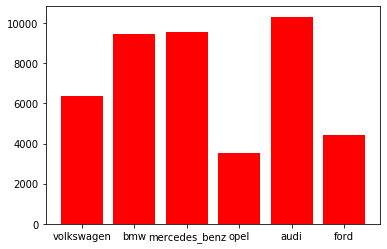

In [72]:
plt.bar(list(brand_mean_prices.keys()), brand_mean_prices.values(), color = "r")
plt.show()

In [73]:
brand_mean_mileage = {}

for brand in popular_brands:
    brand_mean_mileage[brand] = autos[autos["brand"] == brand]["kilometer"].mean()

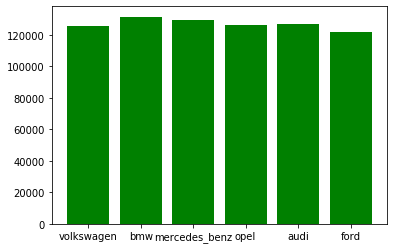

In [74]:
plt.bar(list(brand_mean_mileage.keys()), brand_mean_mileage.values(), color = "g")
plt.show()

In [75]:
autos_ml = autos[["price", "registration_year", "power_PS", "km_per_year", "unrepaired_damage", "automatik"]]

In [76]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [77]:
target = autos_ml["price"]
data = autos_ml[["registration_year", "power_PS", "km_per_year", "unrepaired_damage", "automatik"]]

In [78]:
target.shape

(247358,)

In [79]:
X_train = data[:200000]
y_train = target[:200000]
X_test = data[200000:]
y_test = target[200000:]

In [80]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
lin_reg.score(X_test, y_test)

0.49034620910817117

In [82]:
from sklearn.svm import LinearSVR

svr_reg = LinearSVR()

In [83]:
svr_reg.fit(X_train, y_train)

/Users/robertpormetter/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [84]:
svr_reg.score(X_test, y_test)

0.4086438580369992

Before we go one trying out different models, let's think about what we could do to the data to make it even more suitable for Machine Learning.

Let's see, how the different features are distributed.

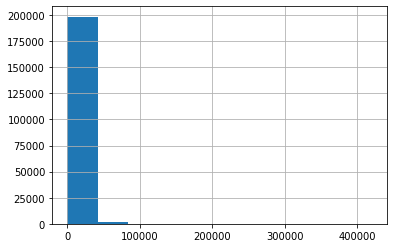

In [85]:
y_train.hist()

In [86]:
y_train = np.log1p(y_train)

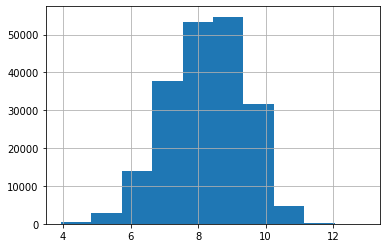

In [87]:
y_train.hist()

Now our target value is much better distributed.

In [88]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [89]:
param_grid = {"n_neighbors":[3, 4, 5, 6, 7],
             "algorithm": ["ball_tree", "brute"],
             "leaf_size":[25, 30, 35]}
knn_reg = KNeighborsRegressor()

rnd_search_knr = RandomizedSearchCV(knn_reg, param_grid)

In [90]:
rnd_search_knr.fit(X_train, y_train)

/Users/robertpormetter/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'brute'],
                                        'leaf_size': [25, 30, 35],
                                        'n_neighbors': [3, 4, 5, 6, 7]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [91]:
rnd_search_knr.best_params_

{'n_neighbors': 7, 'leaf_size': 25, 'algorithm': 'brute'}

In [92]:
param_grid = {"n_neighbors":[7, 8, 9],
             "algorithm": ["brute"],
             "leaf_size":[35, 36, 37, 38]}

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
grid_search_cv = GridSearchCV(knn_reg, param_grid)

In [95]:
# This may take a couple of hours to run
grid_search_cv.fit(X_train, y_train)

/Users/robertpormetter/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['brute'], 'leaf_size': [35, 36, 37, 38],
                         'n_neighbors': [7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [96]:
grid_search_cv.best_params_

{'algorithm': 'brute', 'leaf_size': 35, 'n_neighbors': 9}

After finding the best paramters, we can use them to train a model for production.

In [97]:
knn_reg = KNeighborsRegressor(n_neighbors= 9, leaf_size= 35, algorithm= "brute")

In [98]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=35, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

In [99]:
knn_reg.score(X_test, y_test)

-0.5173120062129983

# Conclusion:
This was my first try at creating a somewhat thorough Data Science project. It included some Data Cleaning, Feature Engineering, Scaling, Basic Machine Learning and some Visualization. In the next projects, I'll implement Pipelines, look at better visualization techniques, implement Deep Learning and find a more structured approach to these projects.